<img align="right" src="../../additional_data/banner_siegel.png" style="width:1100px;">

# Plotting data

* [**Sign up to the JupyterHub**](https://www.phenocube.org/) to run this notebook interactively from your browser
* **Compatibility:** Notebook currently compatible with the Open Data Cube environments of the University of Wuerzburg
* **Products used**: 
* **Prerequisites**:  Users of this notebook should have a basic understanding of:
    * How to run a [Jupyter notebook](01_jupyter_introduction.ipynb)
    * The basic structure of the eo2cube [satellite datasets](02_eo2cube.ipynb)
    * How to browse through the available [products and measurements](03_products_and_measurements.ipynb) of the eo2cube datacube 
    * How to [load data from the eo2cube datacube](04_loading_data_and_basic_xarray.ipynb)
    * How the data is stored and structured in a [xarray](05_advanced_xarray.ipynb)
    * Basic understandings of [matplotlib](https://matplotlib.org/)
    * How to use subplots(), to manipulate figure and axis objects in matplotlib ***(for readers who need further information, please check Further Readings.)***

## Description

This notebook introduces users plotting within the datacube environment. It aims to introduces useful options to effectivly visualize raster data in the eo2cube environment. Within this notebook the following topics are covered:

* Plotting `True Color Composite` and `False Color Composite`
* Plotting `Histogram` to show frequency distributions
* Creating `2D-pseudocolor plot` to illustrate spatial variance
* Creating `Facet Plot` to visualize time series
* `Cloud Masking`

***

## Setting up
### Load packages

In [5]:
import datacube
from odc.ui import with_ui_cbk #processing bar for loading data
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt #matplotlib is a plotting for creating static, animated, and interactive visualizations
import seaborn as sns
import hvplot.xarray
%matplotlib inline 
#this line allows plotting within the JupyterLab

import holoviews as hv #holoviews allows interactive plotting
hv.extension('bokeh') #this line allows plotting with the Bokeh server

from clip import clip_xr2gpd #for the clipping function (same path as this script)

ModuleNotFoundError: No module named 'hvplot'

In this script, we need to use two functions from a python script (.py) stored in this environment. 

To import the functions to the current script, we need a relative path to the file and import display_map, rgb (the name of the functions) from DEAPlotting (the name of the file). `sys.path.append()` is used to add a specific path to the python file. 

In [3]:
sys.path.append("../../../../Scripts") #this need to be the path to the Scripts folder
from DEAPlotting import display_map, rgb #this line allows us to use specific functions written in another script

In this example, we will use `data` which contains scenes of the s2_l2a_bavaria product from December 2019 to Februray 2020.

### Load Data

In [4]:
dc = datacube.Datacube(app = '05_advanced_xarray', config = '/home/datacube/.datacube.conf')

In [5]:
data = dc.load(product= "s2_l2a_burkinafaso",
               x= (-0.75, -0.7),
               y= (11.5, 11.55),
               time= ("2019-01-01","2019-02-28"),
               progress_cbk=with_ui_cbk())

Let's have a look of our data.

## **RGB Image**

To have a first view of our data, we can use the function `rgb()` defined in our written script DEAPlotting. It can be found under the folder Scripts where we do the import. rgb( ) can be used to plot different bands in the Data Variables in the red, blue, and green channels (in this order). If we input all three bands accordingly into the channels, it is called a **true color composite**, otherwise it is plotted as a **false color composite**.

However, we have to pay attention that the function can only plot in two dimensions (longitude and latitude). Hence, we can only input data array from a single time stamp. Here, we plot only the first time stamp (time = [0]), with col="time" argument we define the collapse of time dimension. We can look for the band name under Data Variables of the data set.

#### **1) True Color Composite**
With True color composite we input all bands accordingly.

In [17]:
data

<xarray.Dataset>
Dimensions:          (latitude: 550, longitude: 550, time: 6)
Coordinates:
  * time             (time) datetime64[ns] 2019-01-07T10:36:33.500000 ... 201...
  * latitude         (latitude) float64 11.55 11.55 11.55 ... 11.5 11.5 11.5
  * longitude        (longitude) float64 -0.75 -0.7499 -0.7498 ... -0.7001 -0.7
    spatial_ref      int32 4326
Data variables:
    coastal_aerosol  (time, latitude, longitude) uint16 930 930 930 ... 859 859
    blue             (time, latitude, longitude) uint16 1214 1194 ... 1009 980
    green            (time, latitude, longitude) uint16 2176 2192 ... 1506 1534
    red              (time, latitude, longitude) uint16 2764 2770 ... 1954 2026
    veg5             (time, latitude, longitude) uint16 2777 2777 ... 2291 2376
    veg6             (time, latitude, longitude) uint16 1664 1664 ... 2383 2522
    veg7             (time, latitude, longitude) uint16 1635 1635 ... 2508 2714
    nir              (time, latitude, longitude) uint16 1384 1396 ... 2656 2776
    narrow_nir       (time, latitude, longitude) uint16 1079 1079 ... 2741 2906
    water_vapour     (time, latitude, longitude) uint16 589 589 ... 2657 2657
    swir1            (time, latitude, longitude) uint16 373 373 ... 4330 4697
    swir2            (time, latitude, longitude) uint16 287 287 ... 3553 3867
    scl              (time, latitude, longitude) uint8 6 6 6 6 6 6 ... 5 5 5 5 5
Attributes:
    crs:           EPSG:4326
    grid_mapping:  spatial_ref

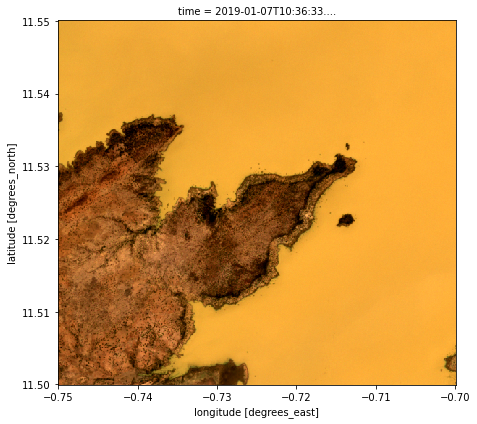

In [6]:
rgb(data.isel(time=[0]), bands=['red', 'green', 'blue'], col="time")

#### **2) False Color Composite**
Here we visualize Land/Water composite. You can also try out [different combinations](https://gsp.humboldt.edu/OLM/Courses/GSP_216_Online/lesson3-1/composites.html) which fit for different purposes.

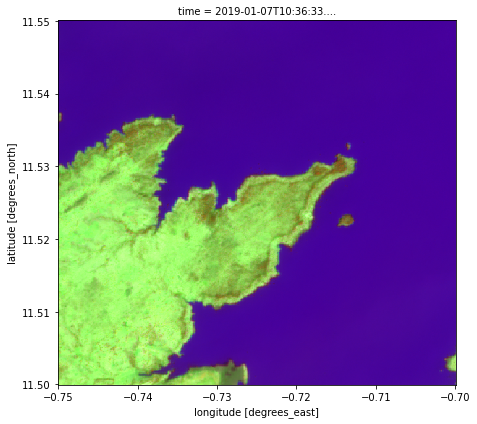

In [39]:
rgb(data.isel(time=[0]), bands=['nir', 'swir1', 'red'], col="time")

## **Histogram**
Besides, we can look at distribution of pixel values by plotting a histogram (i.e. using plot() for a multi-temporal xarray dataset). We can see most of the pixel reflectances lie between 400 and 1000.

(array([3.96000e+02, 2.01000e+03, 1.03860e+04, 2.85000e+04, 5.37240e+04,
        8.86150e+04, 1.13177e+05, 5.80818e+05, 2.96220e+04, 2.52000e+02]),
 array([ 139. ,  238.4,  337.8,  437.2,  536.6,  636. ,  735.4,  834.8,
         934.2, 1033.6, 1133. ]),
 <BarContainer object of 10 artists>)

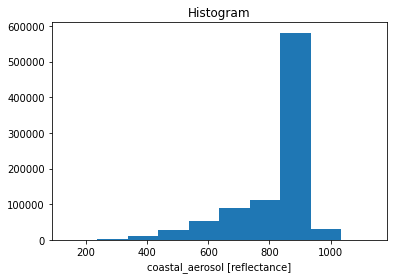

In [53]:
data.coastal_aerosol.plot()

## **2D pcolormesh**
#### **1) Plotting Single Band**
We can also directly plot single individual band using xarray functionality. Important to note that it only take one time stamp and one data variable by default. Here we plot coastal aerosol band with the plot function. A specific [colormap](https://matplotlib.org/stable/tutorials/colors/colormaps.html) can be added with the cmap argument and all ther functionality of matplotlib are also available. The argument robust can be used to remove outliners.

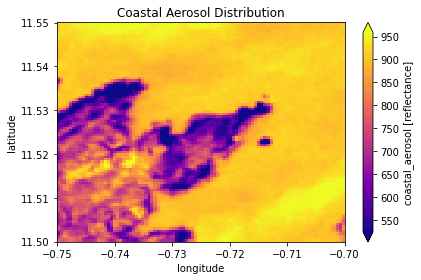

In [56]:
data.coastal_aerosol.isel(time=[0]).plot(robust=True, cmap=plt.cm.plasma)

plt.title("Coastal Aerosol Distribution") #title
plt.ylabel("latitude") #labels
plt.xlabel("longitude")
plt.tight_layout() #remove excessive space in layout
plt.show() #show plot

Levels argument can be used to set a discrete scale instead of continuous color scale. Note that seaborn colormap can only be used together with levels argument. We can see coastal aerosol is lower above the lake area.

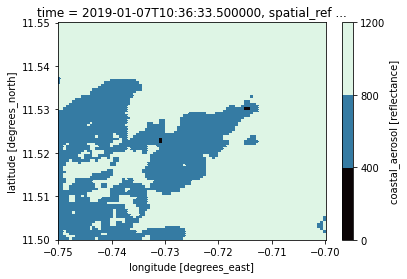

In [67]:
data.coastal_aerosol.isel(time=[0]).plot(levels = 3, cmap="mako") #3 levels only

#### **2) Facet Plot**
We can plot facet plot with the col="time" argument to show all time stamps. Note that plotting too many time stamps at once is not recommanded.

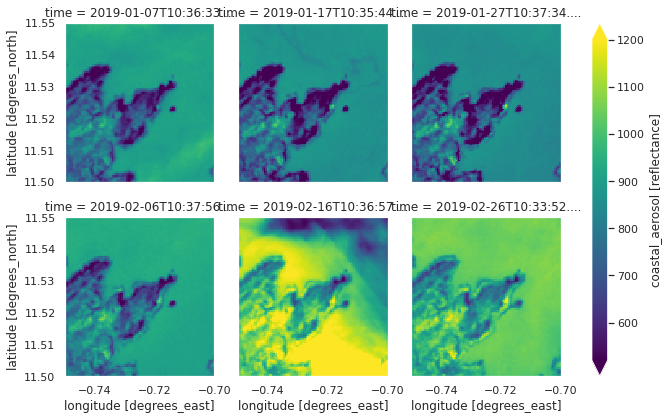

In [247]:
data.coastal_aerosol.plot(robust=True, col="time", col_wrap=3)

#### **3) Masking**
We can also mask out area in the plot. The following code excludes water area (scl = 6). Please note that here the water mask is flawed.

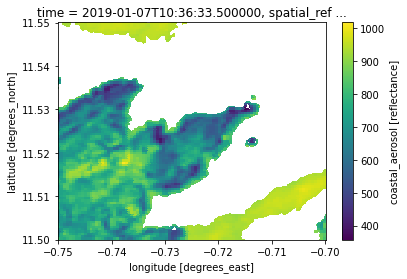

In [112]:
data.coastal_aerosol.isel(time=[0]).where(data.scl != 6).plot()

#### **4) Average**
We can also do resampling (resample() + mean()) before plotting to get monthly average values. Here we get values for January and February respectively.

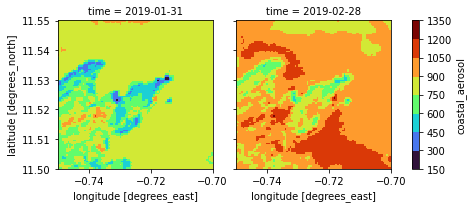

In [106]:
data.coastal_aerosol.resample(time='1M').mean().plot(col="time", cmap="turbo", levels=10)

In [4]:
from eo2cube_tools.plot import plot_band

plot_band(data)

NameError: name 'data' is not defined

## Recommended next steps

To continue with the beginner's guide, the following notebooks are designed to be worked through in the following order:

1. [Jupyter Notebooks](01_jupyter_introduction.ipynb)
2. [eo2cube](02_eo2cube.ipynb)
3. [Products and Measurements](03_products_and_measurements.ipynb)
4. [Loading data](04_loading_data.ipynb)
5. [Advanced xarrays operations](05_advanced_xarray.ipynb)
6. **Plotting data (this notebook)**
7. [Basic analysis of remote sensing data](07_basic_analysis.ipynb)
8. [Parallel processing with Dask](08_parallel_processing_with_dask.ipynb)

***

## Further Reading
For users who are not familar with basics functionality and plottings of matplotlib, please check on the following external tutorial to learn about:

1) [Short Introduction of Matplotlib](https://towardsdatascience.com/matplotlib-tutorial-learn-basics-of-pythons-powerful-plotting-library-b5d1b8f67596)

*  Plotting options and parameters of Matplotlib

2) [Introduction to Plotting in Python Using Matplotlib](https://www.earthdatascience.org/courses/scientists-guide-to-plotting-data-in-python/plot-with-matplotlib/introduction-to-matplotlib-plots/).

*  Introduction to pyplot module
*  Customize Plots Using Matplotlib (Tick, Label, Title, Marker, Color, etc.)

3) Working With Datetime Objects in Python

*  [Introduction to Datetime Object](https://www.earthdatascience.org/courses/use-data-open-source-python/use-time-series-data-in-python/date-time-types-in-pandas-python/)
*  [Customize Matplotlibe Dates Ticks on the x-axis in Python](https://www.earthdatascience.org/courses/scientists-guide-to-plotting-data-in-python/plot-with-matplotlib/introduction-to-matplotlib-plots/plot-time-series-data-in-python/)

<br>
To continue working through the notebooks in this beginner's guide, the following notebooks are designed to be worked through in the following order:

1. [Jupyter Notebooks](https://github.com/eo2cube/eo2cube_notebooks/blob/main/get_started/intro_to_eo2cube/01_jupyter_introduction.ipynb)
2. [eo2cube](https://github.com/eo2cube/eo2cube_notebooks/blob/main/get_started/intro_to_eo2cube/02_eo2cube_introduction.ipynb)
3. [Loading Data](https://github.com/eo2cube/eo2cube_notebooks/blob/main/get_started/intro_to_eo2cube/03_data_lookup_and_loading.ipynb)
4. [Xarray I: Data Structure](https://github.com/eo2cube/eo2cube_notebooks/blob/main/get_started/intro_to_eo2cube/04_xarrayI_data_structure.ipynb)
5. [Xarray II: Index and Statistics](https://github.com/eo2cube/eo2cube_notebooks/blob/main/get_started/intro_to_eo2cube/05_xarrayII.ipynb)
6. ***Plotting data (this notebook)***
7. [Spatial analysis](https://github.com/eo2cube/eo2cube_notebooks/blob/main/get_started/intro_to_eo2cube/07_basic_analysis.ipynb)
8. [Parallel processing with Dask](https://github.com/eo2cube/eo2cube_notebooks/blob/main/get_started/intro_to_eo2cube/08_parallel_processing_with_dask.ipynb)

The additional notebooks are designed for users to build up both basic and advanced skills which are not covered by the beginner's guide. Self-motivated users can go through them according to their own needs. They act as complements for the guide:
<br>

1. [Python's file management tools](https://github.com/eo2cube/eo2cube_notebooks/blob/main/get_started/intro_to_eo2cube/I_file_management.ipynb)
2. [Image Processing basics using NumPy and Matplotlib](https://github.com/eo2cube/eo2cube_notebooks/blob/main/get_started/intro_to_eo2cube/II_numpy_image_processing.ipynb)
3. [Vector Processing](https://github.com/eo2cube/eo2cube_notebooks/blob/main/get_started/intro_to_eo2cube/III_process_vector_data.ipynb)
4. [Advanced Plotting](https://github.com/eo2cube/eo2cube_notebooks/blob/main/get_started/intro_to_eo2cube/IV_advanced_plotting.ipynb)

***

## Additional information

<font size="2">This notebook for the usage in the Open Data Cube entities of the [Department of Remote Sensing](http://remote-sensing.org/), [University of Wuerzburg](https://www.uni-wuerzburg.de/startseite/), is adapted from [Geoscience Australia](https://github.com/GeoscienceAustralia/dea-notebooks), published using the Apache License, Version 2.0. Thanks! </font>

**License:** The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 
Digital Earth Australia data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.


**Contact:** If you would like to report an issue with this notebook, you can file one on [Github](https://github.com).

**Last modified:** February 2021